# Clustering and sentence embedding using BioSentVEc

Step1:Download and install sent2vec model with c++, cython

Step2:Downloaded BioSentVec model and installed all the related python libraries

#### (1) The Sent2vec homepage (https://github.com/epfml/sent2vec) has a few pre-trained sentence embeddings from general English copora. 

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
import string

In [2]:
import sent2vec
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from scipy.spatial import distance

ImportError: numpy.core.multiarray failed to import

## Loading BioSentVec model

In [4]:
model_path = '/Users/ajai/Desktop/BioSentVec/BioSentVec_PubMed_MIMICIII-bigram_d700.bin'
model = sent2vec.Sent2vecModel()
try:
    model.load_model(model_path)
except Exception as e:
    print(e)
print('model successfully loaded')

model successfully loaded


## Preprocess sentences

There is no one-size-fits-all solution to preprocess sentences. We demonstrate a representative code example as below. This is also consistent with the preprocessing approach when BioSentVec models were trained.

In [5]:
stop_words = set(stopwords.words('english'))
def preprocess_sentence(text):
    tokens = [token for token in word_tokenize(text) if token not in string.punctuation and token not in stop_words]
    return ' '.join(tokens)

An example of using the preprocess_sentence function: 

In [217]:
sentence = preprocess_sentence('while having coronoavirus it isbetter to wash hands')
print(sentence)

coronoavirus isbetter wash hands


## Retrieving a sentence vector

Once a sentence is preprocessed, we can pass it to the BioSentVec model to retrieve a vector representation of the sentence.

In [230]:
sentence_vector = model.embed_sentence(sentence)
print(sentence_vector)

[[ 4.97268885e-01 -1.00692117e-03  1.68705672e-01  5.97206354e-01
   1.15028009e-01 -5.02117395e-01 -7.19179094e-01  3.14612031e-01
   1.44628316e-01  2.50275970e-01 -5.85523397e-02  6.20775223e-01
  -8.16104338e-02  2.70682484e-01 -6.46098405e-02  3.25555950e-01
   4.74967808e-01  5.72420835e-01 -4.56831217e-01 -8.55217576e-01
  -8.06858540e-02  1.34120882e-02  5.65300345e-01  2.98662841e-01
   3.14899057e-01 -8.12476158e-01  7.61235654e-01 -1.17874110e+00
  -2.45411247e-01 -3.88459295e-01 -5.13220057e-02  3.74684304e-01
  -2.62232184e-01 -1.45889089e-01 -5.35564244e-01 -4.99149323e-01
   1.78582713e-01 -3.93996418e-01 -1.28427491e-01 -9.13547158e-01
  -4.47847128e-01 -5.37523985e-01 -4.85672891e-01  8.97020280e-01
  -1.42681196e-01 -5.72904229e-01  8.51094007e-01 -5.24533615e-02
   1.52560975e-02  3.24985474e-01 -6.65421963e-01  4.48682308e-01
   5.98129988e-01 -2.80605584e-01 -1.45621419e-01  4.73908603e-01
  -2.62347519e-01  2.39337012e-01  1.16250217e-01 -5.92007399e-01
  -2.99766

Note that you can also use embed_sentences to retrieve vector representations of multiple sentences.

The shape of the vector representation depends on the dimension parameter. In this case, we set the dimension to 700: 

In [231]:
print(sentence_vector.shape)

(1, 700)


## Computing sentence similarity

In this section, we demonstrate how to compute the sentence similarity between a sentence pair using the BioSentVec model. We firstly use the above code examples to get vector representations of sentences. Then we compute the cosine similarity between the pair.

In [189]:
sentence_vector1 = model.embed_sentence(preprocess_sentence('Breast cancers with HER2 amplification have a higher risk of CNS metastasis and poorer prognosis.'))
sentence_vector2 = model.embed_sentence(preprocess_sentence('Breast cancers with HER2 amplification are more aggressive, have a higher risk of CNS metastasis, and poorer prognosis.'))

cosine_sim = 1 - distance.cosine(sentence_vector1, sentence_vector2)
print('cosine similarity:', cosine_sim)

cosine similarity: 0.9813870787620544


Here is another example for a pair that is relatively less similar.

In [190]:
sentence_vector3 = model.embed_sentence(preprocess_sentence('It is said that each dog has its day is a relative metaphor in the domain'))
cosine_sim = 1 - distance.cosine(sentence_vector1, sentence_vector3)
print('cosine similarity:', cosine_sim)

cosine similarity: 0.16153746843338013


### as we see that the similarity score is quite less

Few useful resources

#### (1) The Sent2vec homepage (https://github.com/epfml/sent2vec) has a few pre-trained sentence embeddings from general English copora. 

## Project Code----->

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_json('~/Desktop/Project_NER/CORD-19/CORD-NER-full.json',lines=True)

In [8]:
df['body'][3138]

'1,3-Diphenyl-4,5-dihydro-1H-pyrazol-5-one'

print the basic dataset

In [7]:
df.head(2)

,id,source,doi,pmcid,pubmed_id,publish_time,authors,journal,title,abstract,body,entities
0,0,CZI,10.1007/s00134-020-05985-9,,32125455,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,Angiotensin-converting enzyme 2 (ACE2) as a SA...,,SARS-CoV-2 has been sequenced [3] . A phylogen...,"[{'text': 'Angiotensin-converting enzyme 2', '..."
1,1,CZI,10.1038/s41421-020-0147-1,,,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,Comparative genetic analysis of the novel coro...,,Comparative genetic analysis of the novel coro...,"[{'text': 'genetic analysis', 'start': 12, 'en..."


In [193]:
df.entities[0]

[{'text': 'Angiotensin-converting enzyme 2',
  'start': 0,
  'end': 31,
  'type': 'GENE_OR_GENOME'},
 {'text': 'ACE2', 'start': 33, 'end': 37, 'type': 'GENE_OR_GENOME'},
 {'text': 'SARS-CoV-2', 'start': 44, 'end': 54, 'type': 'CORONAVIRUS'},
 {'text': 'receptor', 'start': 55, 'end': 63, 'type': 'CHEMICAL'},
 {'text': 'SARS-CoV-2', 'start': 120, 'end': 130, 'type': 'CORONAVIRUS'},
 {'text': 'phylogenetic', 'start': 158, 'end': 170, 'type': 'EVOLUTION'},
 {'text': 'bat', 'start': 195, 'end': 198, 'type': 'WILDLIFE'},
 {'text': 'SARS-CoV-2', 'start': 214, 'end': 224, 'type': 'CORONAVIRUS'},
 {'text': 'intermediate hosts', 'start': 259, 'end': 277, 'type': 'NORP'},
 {'text': 'SARS-CoV-2', 'start': 282, 'end': 292, 'type': 'CORONAVIRUS'},
 {'text': 'pangolins', 'start': 304, 'end': 313, 'type': 'WILDLIFE'},
 {'text': 'mice', 'start': 323, 'end': 327, 'type': 'ORGANISM'},
 {'text': 'rats', 'start': 332, 'end': 336, 'type': 'EUKARYOTE'},
 {'text': 'SARS-CoV-2', 'start': 374, 'end': 384, 'type

In [8]:
df = df[df['title']!='']
#Snce there are 370 rows with no title

In [35]:
df.shape

(29130, 12)

Check for null values

In [46]:
df.isnull().sum()

index           0
id              0
source          0
doi             0
pmcid           0
pubmed_id       0
publish_time    0
authors         0
journal         0
title           0
abstract        0
body            0
entities        0
dtype: int64

let us check the entities

In [9]:
df.reset_index(inplace=True)

In [14]:
entity =[]
for i in range(0,df.shape[0]):
    for j in range(0,len(df.entities[i])):
        entity.append(df.entities[i][j]['type'])
# all entities are grouped in a list for the bar graph to count the frequency of the highest

In [15]:
entity = pd.Series(entity)
entity = entity.value_counts()

In [16]:
entity

CHEMICAL                2119604
GENE_OR_GENOME          1934600
DISEASE_OR_SYNDROME      860453
CARDINAL                 754580
DATE                     686813
                         ...   
EDUCATIONAL_ACTIVITY       1739
LANGUAGE                   1555
PHYSICAL_SCIENCE           1407
GROUP_ATTRIBUTE             865
ARCHAEON                    497
Length: 63, dtype: int64

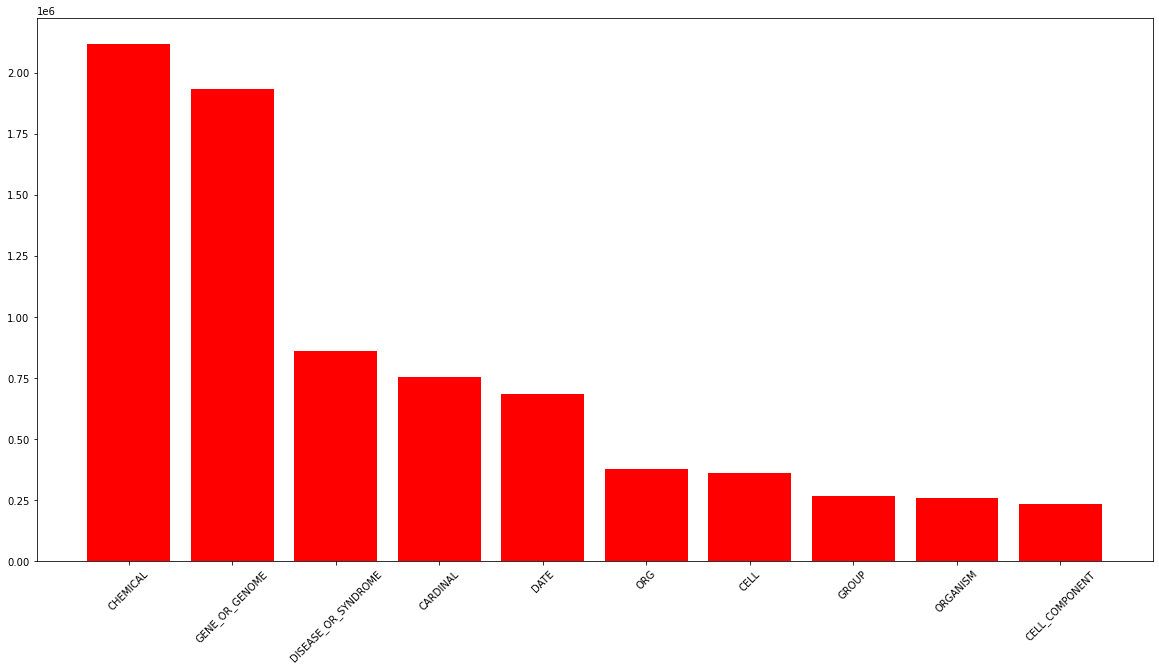

In [17]:
plt.figure(figsize=(20,10))
plt.bar(entity.index[:10],height=entity.values[:10],color='red')
plt.xticks(rotation=45)
plt.show()

The entities are compared in the barchart. CHEMICAL and GENE_OR_GENOME has highest count

We will try kmeans clustering method to extract articles and group them 

In [18]:
df.tail(2)

,index,id,source,doi,pmcid,pubmed_id,publish_time,authors,journal,title,abstract,body,entities
29128,29137,29137,biorxiv,doi.org/10.1101/2020.02.27.967760,,,2020-03-11,"Li, M.; Chen, L.; Xiong, C.; Li, X.",0,The SARS-CoV-2 receptor ACE2 expression of mat...,Recent studies have demonstrated that SARS-CoV...,The new type of pneumonia caused by the SARS-C...,"[{'text': 'SARS-CoV-2', 'start': 4, 'end': 14,..."
29129,29138,29138,biorxiv,doi.org/10.1101/2020.03.09.984856,,,2020-03-11,"Ekins, S.; Madrid, P.",0,Tilorone: A Broad-Spectrum Antiviral For Emerg...,Tilorone is a 50-year-old synthetic small-mole...,Tilorone is a 50-year-old synthetic small-mole...,"[{'text': 'Tilorone', 'start': 0, 'end': 8, 't..."


In [10]:
# we will need to extract the sentences from the text column and then embed them using the model
articles_cluster = []
for i in range(0,df.shape[0]):
    articles_cluster.append(model.embed_sentence(preprocess_sentence(df.title[i])))

In [11]:
articles_vector = np.array(articles_cluster)#convert the articles cluster to an numpy array

In [12]:
articles_vector.shape

(29130, 1, 700)

In [13]:
articles_vector[0].shape # first title vector

(1, 700)

In [14]:
df_articles = pd.DataFrame(index = np.arange(df.shape[0]),columns=np.arange(0,articles_vector.shape[2]))

In [15]:
df_articles.shape

(29130, 700)

In [16]:
for i in range(df.shape[0]):
    df_articles.iloc[i] = articles_vector[i]

In [17]:
df_articles

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,-0.229183,0.500175,0.0289,0.003855,0.243581,0.085065,-0.118186,-0.0495,0.0146,0.138715,...,-0.064103,-0.205565,-0.125968,-0.119392,0.064084,0.216475,-0.195961,-0.041698,-0.069114,0.199023
1,-0.050632,0.481108,0.045197,-0.066107,0.218962,0.315102,0.000894,-0.123958,0.116242,0.244705,...,-0.215653,-0.20305,0.128101,0.147213,-0.084414,0.006462,-0.014605,-0.138314,-0.231735,0.042065
2,0.577315,0.813512,-0.398189,0.189031,0.070015,-0.302102,-0.655036,-0.692529,0.04195,0.73677,...,-0.420014,0.626387,-0.188321,0.421099,0.19805,-0.887021,0.84324,-1.047482,-0.314892,-0.137212
3,0.577315,0.813512,-0.398189,0.189031,0.070015,-0.302102,-0.655036,-0.692529,0.04195,0.73677,...,-0.420014,0.626387,-0.188321,0.421099,0.19805,-0.887021,0.84324,-1.047482,-0.314892,-0.137212
4,-0.221876,-0.174439,-0.144193,0.33354,0.06126,0.151437,-0.245559,-0.15443,0.311283,0.262655,...,-0.005657,-0.222302,-0.373521,-0.454768,-0.007866,0.187263,0.503395,-0.192208,0.370189,0.423959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29125,0.257407,0.527557,-0.172475,-0.281939,0.017653,0.26742,0.136885,0.144733,0.277161,0.259172,...,-0.183814,-0.074932,-0.121331,-0.161957,-0.123029,-0.027648,-0.180095,0.088356,-0.057311,-0.169447
29126,0.18769,0.4884,0.045389,0.030047,0.090557,0.209531,0.198532,0.174291,0.043984,0.122862,...,-0.356899,-0.031866,0.079943,-0.058378,0.118936,0.02529,-0.24587,-0.088356,0.068743,-0.095114
29127,-0.099764,0.322724,-0.156672,-0.371651,-0.084756,0.346951,-0.088342,-0.144955,0.142729,0.335452,...,-0.178886,-0.18498,0.272601,-0.068751,-0.102914,0.057937,0.115529,-0.254423,-0.253983,0.229428
29128,-0.215069,0.332048,0.05377,-0.089903,0.298615,0.120763,0.107292,-0.121588,0.175306,0.225252,...,-0.075676,0.038898,-0.065003,-0.033764,0.182621,-0.020982,-0.148105,0.023885,0.078158,-0.06233


In [50]:
df_articles.to_csv('article_title_vectors.csv')

Written to a csv file above

Applying the Kmeans

In [65]:
wcss = []
kmeans = KMeans(n_clusters=15, max_iter=300, n_init=10, random_state=0)
for i in range(1,15):
    kmeans.set_params(n_clusters=i)
    kmeans.fit(df_articles)
    wcss.append(kmeans.inertia_)

(0.0, 20.0)

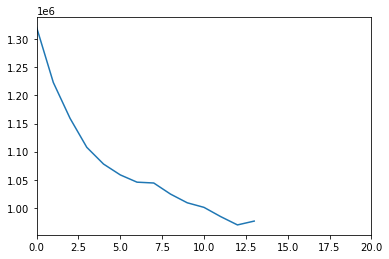

In [68]:
plt.plot(wcss)
plt.xlim(0,)

In [ ]:
kmeans 

## 

In [18]:
kmeans = KMeans(n_clusters=12, max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_articles)

KMeans(n_clusters=12, random_state=0)

In [73]:
kmeans.labels_

array([1, 3, 2, ..., 2, 1, 3], dtype=int32)

In [19]:
# function for prediction of any query
def cluster_precict(x):
    x = np.array(x,dtype=np.float)
    pred = kmeans.predict(x)
    return pred 

In [104]:
cluster_precict(sentence_vector)# testing a prediction

array([0], dtype=int32)

In [21]:
label = kmeans.fit_predict(df_articles)

In [22]:
df_articles['label'] = label

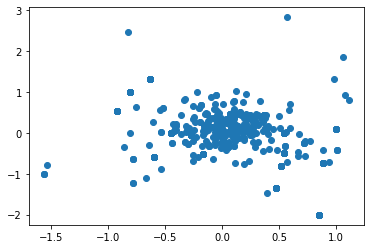

In [23]:
#plotting cluster label 1
filtered_label0 = df_articles[label == 0] 
#plotting the results
plt.scatter(filtered_label0.loc[:,0] , filtered_label0.loc[:,1])
plt.show()

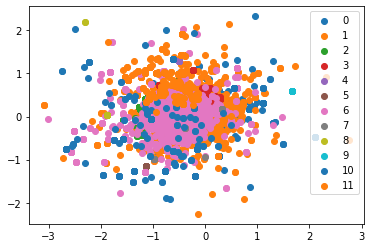

In [24]:
#Getting unique labels and polotting all cluster labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_articles.loc[label == i , 10] , df_articles.loc[label == i , 100] , label = i)
plt.legend()
plt.show()

## As it looks dense we can try DBscan?

In [1]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5)
dbscan.fit(df_articles)

NameError: name 'df_articles' is not defined

In [ ]:
df_articles['db_label'] = dbscan.labels_

In [ ]:
df_articles['db_label'].value_counts()

In [148]:
df_articles.loc[df_articles['db_label']==0]

,0,1,2,3,4,5,6,7,8,9,...,692,693,694,695,696,697,698,699,label,db_label
0,-0.086536,0.31081,0.101684,-0.019396,0.416193,0.104258,-0.141617,0.130868,-0.112927,0.142367,...,0.032382,-0.06012,-0.07747,0.010202,-0.078862,-0.046948,-0.142233,0.265647,1,0
1,0.079848,0.460003,0.15982,-0.178652,0.353134,0.209907,-0.134953,0.061427,-0.061741,0.278511,...,0.216858,0.077333,-0.07596,-0.120516,-0.008956,-0.195667,-0.318385,0.195244,3,0
2,0.137431,0.08095,0.012767,-0.05746,0.091392,0.261665,-0.039086,-0.267013,0.095492,0.295916,...,-0.007551,0.01953,0.01353,-0.020448,0.102746,-0.125465,-0.182661,-0.020616,2,0
3,0.513761,0.688911,0.305947,-0.254045,0.120582,0.335439,0.136482,-0.376422,0.211201,0.46728,...,-0.021891,-0.350537,-0.1006,0.014875,0.26016,-0.239833,0.096492,-0.035191,0,0
4,-0.135192,-0.024293,-0.020515,0.148099,0.193088,0.070037,-0.176036,-0.143634,0.218701,0.198941,...,-0.272298,-0.332335,-0.035982,0.233552,0.469564,-0.021576,0.483406,0.324699,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29125,0.276533,0.465274,-0.247294,-0.301858,0.094085,0.298866,0.128078,0.110252,0.198556,0.11652,...,-0.088129,-0.113639,-0.070698,-0.094249,-0.14798,0.101359,-0.074465,-0.277613,3,0
29126,0.123291,0.614099,-0.118011,-0.047422,0.013158,0.110394,0.115185,0.076143,0.001595,0.091384,...,-0.019863,-0.046356,0.164713,-0.037667,-0.203965,-0.059952,0.049814,-0.241245,1,0
29127,-0.105878,0.373296,-0.16173,-0.32585,-0.011681,0.35119,-0.019529,-0.175253,0.145701,0.363368,...,0.252274,0.006947,-0.013912,0.02674,0.07922,-0.307311,-0.171696,0.184253,2,0
29128,-0.084396,0.304359,0.182653,-0.268683,0.370308,0.049986,0.034978,-0.032146,0.03528,0.263371,...,-0.039425,0.000491,0.052711,-0.094105,-0.138083,-0.063745,-0.032544,0.059383,1,0


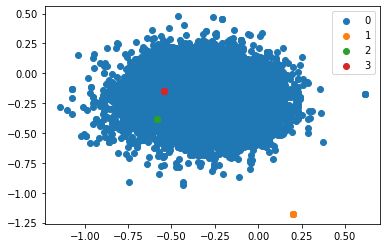

In [153]:
db_labels = np.unique(dbscan.labels_)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_articles.loc[df_articles['db_label']==i,10] , df_articles.loc[df_articles['db_label']==i,50] , label = i)
plt.legend()
plt.show()

We can try the nearest neighbour model based on what we see in the clustering

In [173]:
df_articles_knn = df_articles.drop(['label'], axis =1)

In [174]:
df_articles_knn_target = df_articles['label']

In [179]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15,metric='cosine')
knn.fit(df_articles_knn,df_articles_knn_target)

KNeighborsClassifier(metric='cosine', n_neighbors=15)

In [294]:
def article_cluster(query):
    similar = []
    query = model.embed_sentence(query)
    class_pred = knn.predict(query)
    #data = df_articles[df_articles['label']==class_pred].drop(['label'],axis=1)
    for i in range(0,len(df_articles)):
        if df_articles['label'][i] == class_pred:
            y = 1- distance.cosine(model.embed_sentence(preprocess_sentence(df['title'][i])),query)
            similar.append(y)
        else:
            similar.append(0)
    for i in range(len(similar)):
        if similar[i] == 1:
            similar[i] = 0
    return np.argmax(similar)
#df['title'][np.argmax(similar)]

In [295]:
sentence  = 'liver functions are affected by the rise in cholesterol'

In [257]:
article_cluster(sentence)

'The pathogenesis of chronic viral hepatitis in the nude mouse and its influence on liver regeneration after partial hepatectomy.'

In [288]:
sentence = 'the world will end'
sentence_vector = model.embed_sentence(sentence)

In [289]:
article_cluster(sentence)

'One world – one health'

prediction_class = knn.predict(sentence_vector)# it belongs to label 1 
prediction_class
w =[]
for i in range(0,len(df_articles)):
    if df_articles['label'][i] == 1:
        x = 1- distance.cosine(model.embed_sentence(preprocess_sentence(df['title'][i])),sentence_vector)
        w.append(x)
    else:
        w.append(0)
for i in range(len(w)):
    if w[i] == 1:
        w[i] = 0
np.argmax(w)
df['title'][23880]

## 

Once we find the articles we will then look at the body of the article and find the closest sentence

In [333]:
sentence = 'The SARS cov-2 can cause death'

In [328]:
article_cluster(sentence)

7337

In [386]:
def doc_cluster(i):
    index = article_cluster(i)
    if df['body'][index] == '':
        return df['title'][index]
    else:
        body = df['body'][index].split('.')
        closest = []
        for items in body:
            d = 1-distance.cosine(model.embed_sentence(items),model.embed_sentence(i))
            closest.append(d)
        for i in range(len(closest)):
            if closest[i] == 1:
                closest[i] = 0
    return body[np.argmax(closest)] + body[np.argmax(closest)+1]

In [359]:
doc_cluster('The SARS cov-2 can cause death')

' This finding suggested that, although PHEV infection in humans has not been reported currently, there is a definite potential threat to human health'

In [362]:
doc_cluster('is washing hands with soap enough to prevent a disease')

' The rate of handwashing with soap after restroom use in the current study (295%) was similar to those of Thailand (25%) and Ethiopia (22%), the least rate of handwashing with soap was Tanzania (5%)'

In [363]:
doc_cluster('what should we do when we have fever')

" The cat's clinical course of fever was more consistent with a phenobarbital-induced fever similar to drug-induced fever reported in humans Drug-induced fever is a diagnosis of exclusion and an appropriate and thorough work-up for a fever of unknown origin is indicated in order to make the diagnosis"

In [364]:
doc_cluster('is paracetamol really necessary')

' Parents may sometimes not even be aware that they are administering paracetamol [49, 77]  Moreover, there is convincing evidence that paracetamol use by infants, or even by expecting women, may increase the risk of asthma, rhinoconjunctivitis, and eczema in children [50] [51] [52] [78] [79] [80] , although a recent meta-analysis shows that childhood asthma may also be related to respiratory infections during infancy rather than to paracetamol administered to treat them [81] '

In [377]:
doc_cluster('How to check liver')

' TNF-α is a key cytokine involved in both acute and chronic liver diseases, like fulminant hepatic failure, alcohol-induced hepatitis, viral hepatitis, metabolic toxicity, drug-induced liver injury and autoimmune hepatitis This death factor is recognized by the receptors TNFR1 and TNFR2, but most of its biological activity depends on TNFR1 21 '

In [387]:
doc_cluster('why does hair grey so fast')

'A shifty stop for a hairy tail'

In [388]:
doc_cluster('how can we reduce pain for stomach ache')

'Corticosteroids for pain relief in sore throat: systematic review and meta-analysis'

In [389]:
doc_cluster('will the world end')

'Scientists for a better world'

In [390]:
doc_cluster('can we get another pandemic')

'Preventing a covid-19 pandemic'

In [391]:
doc_cluster('what can we do to prevent alzheimer')

'Materialism and dialectics of epidemic prevention and control: only by respecting science can we get twice the result with half the effort'

In [1]:
doc_cluster('How does a virus mutate')

NameError: name 'doc_cluster' is not defined